Input arguments:

 
- Aeq matrix:
 [[ 1  1  0  0  0  0  0]
 [-1  0  1  1  0  0  0]
 [ 0 -1  0  0  1  0  0]
 [ 0  0 -1  0  0  1  0]
 [ 0  0  0  0 -1  0  1]
 [ 0  0  0 -1  0 -1 -1]] 
- Cost matrix: 
 [2 1 2 5 2 1 2] 
- beq vector: 
 [1, 0, 0, 0, 0, -1] 
- Bounds: 
 ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None))

Results using lam = 0.0 5.0

Results using lam = 0.1 5.1

Results using lam = 0.2 5.199999999999999

Results using lam = 0.3 5.299999999999999

Results using lam = 0.4 5.400000000000001

Results using lam = 0.5 5.0

Results using lam = 0.6 4.599999999999999

Results using lam = 0.7 4.200000000000001

Results using lam = 0.8 3.799999999999999

Results using lam = 0.9 3.4000000000000012

Results using lam = 1.0 3.0


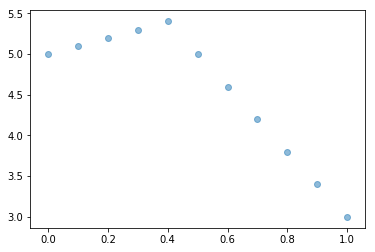

In [69]:
import numpy as np
from scipy.optimize import linprog
from basic_utils import nn2na
import matplotlib.pyplot as plt


# Node-Node matrix
NN = np.array([[0, 1, 1, 0, 0, 0],   #s
               [0, 0, 0, 1, 0, 1],   #2
               [0, 0, 0, 0, 1, 0],   #3
               [0, 0, 0, 0, 0, 1],   #4
               [0, 0, 0, 0, 0, 1],   #5
               [0, 0, 0, 0, 0, 0]])  #t
                     

# A matrix, which is Node-arc matrix. Arcs is a tuple with dim(arcs) = #arcs in the graph
Aeq, arcs = nn2na(NN) 
t = np.array([[3, 1, 3, 1, 3, 3, 5]])

# Cost matrix. Dim(C) = #Arcs
C = np.array([2, 1, 2, 5, 2, 1, 2])

# b Vector. Dim(b) = #nodes
beq = [1, 0, 0, 0, 0, -1]
T = 8

lam = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


# Bounds: 0 por lower, Inf for Upper.
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])
    

def getCm(lam):
    return C + lam * t[0]

print("Input arguments:\n\n",
"\n- Aeq matrix:\n", Aeq,
"\n- Cost matrix: \n", C,
"\n- beq vector: \n", beq,
"\n- Bounds: \n", bounds
)

L = np.zeros(lam.size)
lamMax = 0
for j in range(lam.size):
    Cm = getCm(lam[j])
    #OPTIMIZE:
    result = linprog(Cm, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')
    print("\nResults using lam =", lam[j], result.fun - lam[j] * T)
    L[j] = result.fun - lam[j] * T

plt.scatter(lam, L, alpha=0.5)
plt.show()
